In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

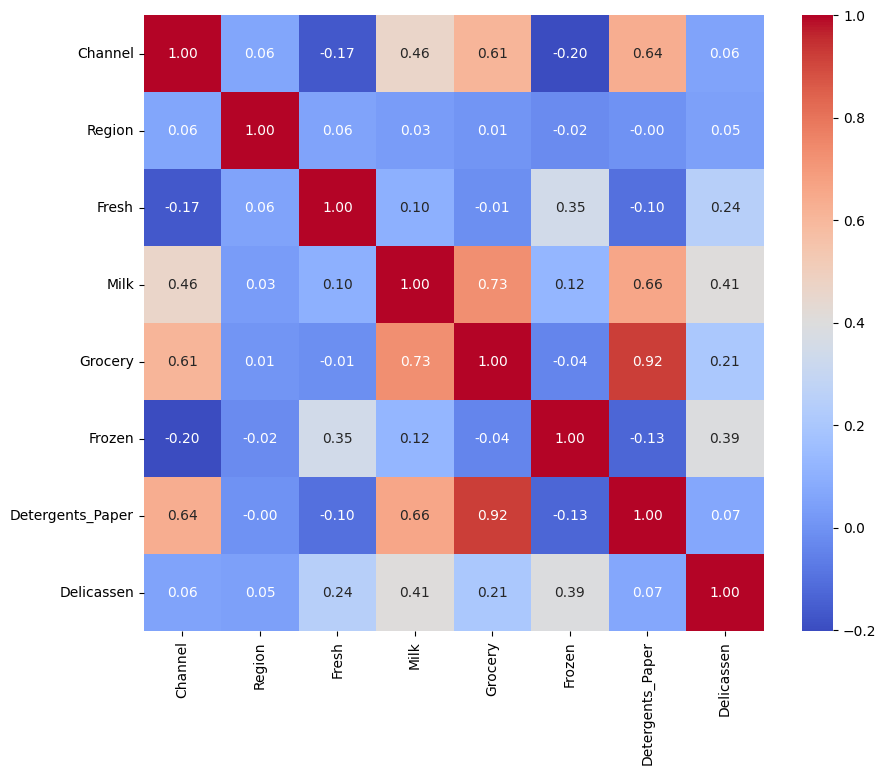

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

<Axes: >

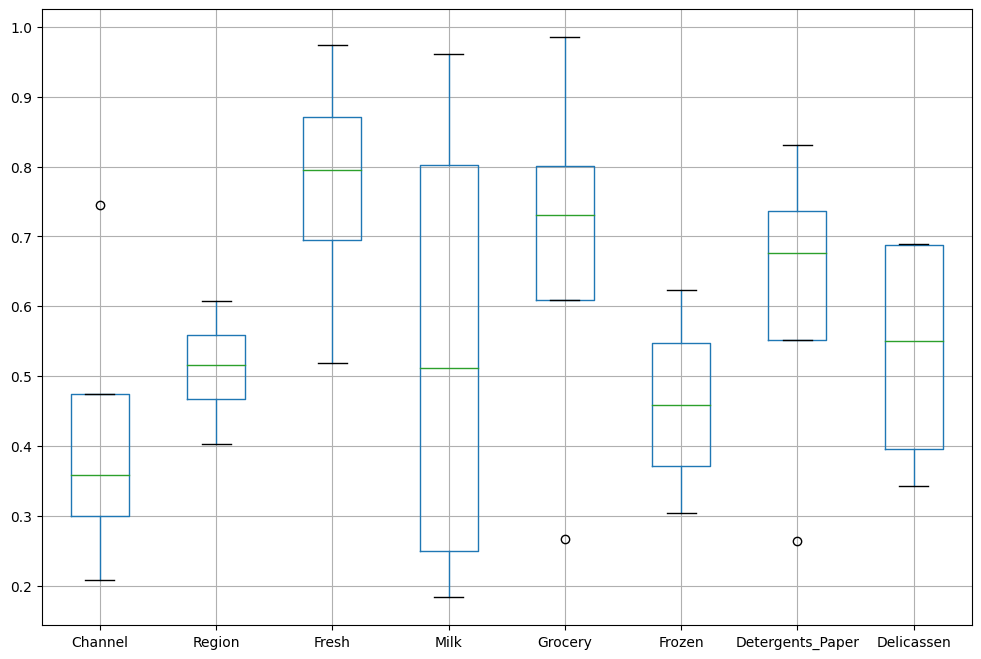

In [8]:
pt = pd.DataFrame(data = np.random.random(size=(4,8)), columns = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'])
plt.figure(figsize =(12, 8))
pt.boxplot()


In [9]:
#Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
cols_to_scale = ['Fresh', 'Frozen']
data_to_scale = data[cols_to_scale]
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the selected columns
scaled_data = scaler.fit_transform(data_to_scale)
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale, index=data.index)
# Replace the original columns with scaled data
data[cols_to_scale] = scaled_df
print(data)

     Channel  Region     Fresh   Milk  Grocery    Frozen  Detergents_Paper  \
0          2       3  0.052933   9656     7561 -0.589367              2674   
1          2       3 -0.391302   9810     9568 -0.270136              3293   
2          2       3 -0.447029   8808     7684 -0.137536              3516   
3          1       3  0.100111   1196     4221  0.687144               507   
4          2       3  0.840239   5410     7198  0.173859              1777   
..       ...     ...       ...    ...      ...       ...               ...   
435        1       3  1.401312  12051    16027  2.075222               182   
436        1       3  2.155293   1431      764  0.296561                93   
437        2       3  0.200326  15488    30243 -0.543380             14841   
438        1       3 -0.135384   1981     2232 -0.419441               168   
439        1       3 -0.729307   1698     2510 -0.620094               477   

     Delicassen  
0          1338  
1          1776  
2        

In [13]:
#clustering

In [14]:
from sklearn.cluster import KMeans

In [16]:
x=data[['Fresh', 'Frozen']]

In [17]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate with in cluster sum of squares
  wcss.append(css)

In [18]:
wcss

[880.0000000000003,
 549.7041242609822,
 376.6315908366047,
 281.48698256174487,
 196.0914631515841,
 155.43746310635365,
 130.745471727755,
 112.07562587242238,
 93.18975954696874,
 81.784567295034]

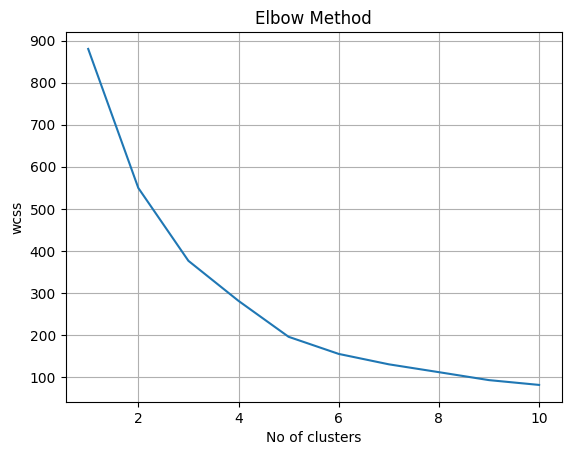

In [19]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [20]:
km=KMeans(n_clusters=5,n_init=10)
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [21]:
cluster_labels=km.predict(x)

In [22]:
cluster_labels

array([1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       4, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 4, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 4, 0, 4, 4, 1, 0, 4, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 3,
       4, 0, 1, 4, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 1, 4, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 3, 4, 0, 1, 0, 4, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 4, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 4, 1, 1, 1, 0, 1, 1, 4, 4, 1, 0, 1, 0, 1, 1, 0, 1, 3, 4, 0,
       0, 1, 1, 1, 1, 1, 0, 4, 1, 4, 4, 0, 1, 0, 1, 1, 3, 3, 1, 4, 0, 1,
       1, 4, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 4, 4, 0, 1, 1, 3, 4, 3, 0,
       1, 4, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

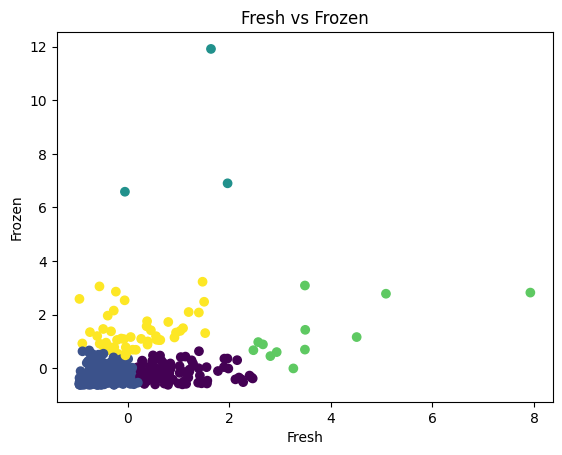

In [23]:
plt.scatter(x['Fresh'],x['Frozen'],c=cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen')
plt.show()

In [24]:
data['Cluster_Labels']=cluster_labels

In [25]:
cluster_indices=np.where(cluster_labels==0)[0]

In [26]:
cluster_indices

array([  4,  12,  13,  14,  18,  20,  23,  24,  25,  29,  30,  32,  33,
        36,  37,  41,  52,  54,  61,  67,  71,  75,  83,  85,  86,  89,
       105, 113, 114, 118, 120, 124, 127, 129, 132, 140, 141, 142, 144,
       145, 149, 150, 152, 157, 162, 165, 202, 210, 217, 220, 226, 232,
       234, 237, 241, 242, 248, 253, 255, 262, 267, 269, 273, 276, 279,
       285, 288, 289, 294, 296, 300, 307, 311, 322, 324, 332, 335, 347,
       356, 360, 368, 370, 373, 377, 380, 382, 387, 402, 403, 404, 421,
       422, 423, 424, 432, 434, 436])

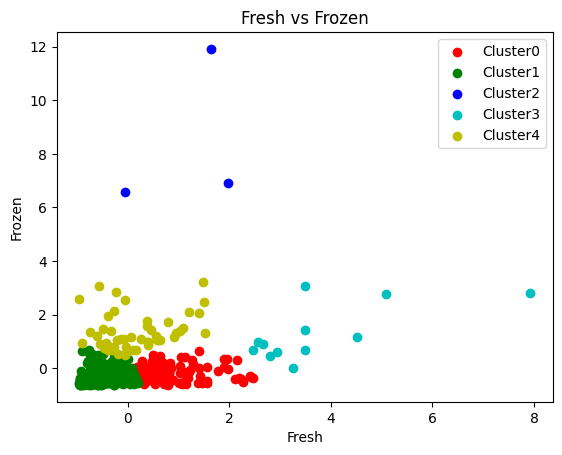

In [27]:
colors=['r','g','b','c','y']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],cluster_data['Frozen'],c=colors[i],label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel("Frozen")
plt.title('Fresh vs Frozen')
plt.legend()
plt.show()

In [28]:
inertia=km.inertia_
print("Inertia = ",inertia)

Inertia =  196.09496688529907


In [29]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.5215597044580688


In [30]:
#AGGLOMERATIVE HIERARCHICHAL CLUSTERING

In [31]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [32]:
mergings=linkage(x,method='ward')

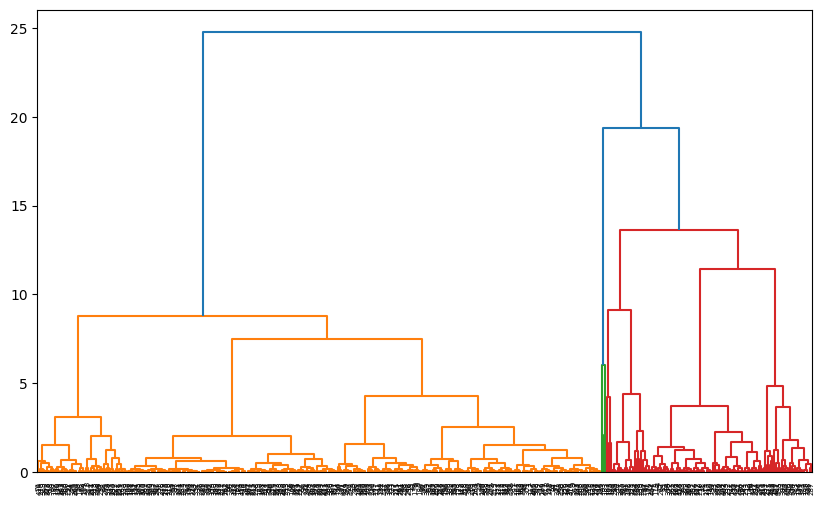

In [33]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [34]:
cluster_labels=fcluster(mergings,20,criterion='distance')

In [35]:
cluster_labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,

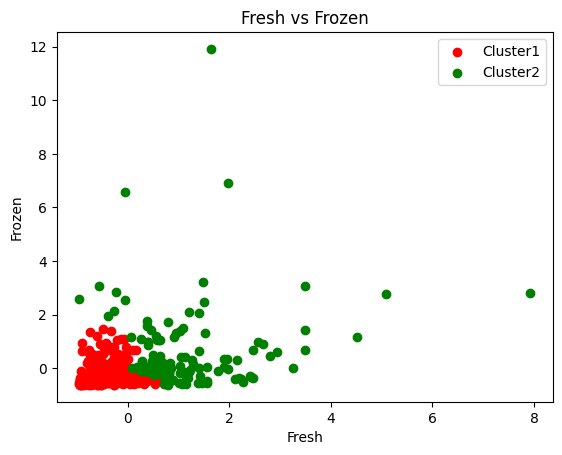

In [36]:
colors=['r','g']
for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],cluster_data['Frozen'],c=colors[i-1],label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel("Frozen")
plt.title('Fresh vs Frozen')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.5118508230180019
